In [1]:
%pip install music21

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import os 
import pandas as pd 
import music21

## Data preprocessing

In [3]:
composer_list = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
data = []

In [4]:
def extract_features(midi_file):
    midi = music21.converter.parse(midi_file)
    
    notes = []
    chords = []
    tempos = []
    
    for element in midi.flat.notes:
        if isinstance(element, music21.note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, music21.chord.Chord):
            chords.append('.'.join(str(n) for n in element.normalOrder))
    
    for tempo in midi.flat.getElementsByClass(music21.tempo.MetronomeMark):
        tempos.append(tempo.number)
    
    return notes, chords, tempos

In [5]:
def process_midi_files(df):
    data = []

    for _, row in df.iterrows():
        midi_path = os.path.join(row['path'], row['midi_file'])
        notes, chords, tempos = extract_features(midi_path)
        data.append({
            'filename': row['midi_file'],
            'composer': row['composer'],
            'notes': notes,
            'chords': chords,
            'tempos': tempos
        })
    
    return pd.DataFrame(data)

In [6]:
for composer in composer_list:
    for dirname, _, filenames in os.walk(f'./data/{composer}/'):
        for filename in filenames:
            if filename.endswith('.mid'):
                midi_path = os.path.join(dirname, filename)
                notes, chords, tempos = extract_features(midi_path)
                data.append({
                    'midi_file': filename,
                    'composer': composer,
                    'path': dirname,
                    'notes': notes,
                    'chords': chords,
                    'tempos': tempos
                })


/Users/I523193/anaconda3/lib/python3.11/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)
/Users/I523193/anaconda3/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Preludiul nr.3 \xeen re minor, BWV 935'>; getting generic Instrument
  warnings.warn(
/Users/I523193/anaconda3/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Preludiul nr.6 \xeen mi minor, BWV 938'>; getting generic Instrument
  warnings.warn(
/Users/I523193/anaconda3/lib/python3.11/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, tra

In [7]:
df = pd.DataFrame(data)
df.head()

,midi_file,composer,path,notes,chords,tempos
0,Bwv0997 Partita for Lute 1mov.mid,Bach,./data/Bach/,"[C3, C5, D5, E-5, G5, B5, C6, B-2, C6, G#2, C5...","[9.10, 7.8, 6.9, 0.3, 0.6, 2, 7.11, 2.5, 3.7, ...","[80, 80, 60, 60, 120, 120, 60, 60, 80, 80]"
1,Bwv0535 Prelude and Fugue.mid,Bach,./data/Bach/,"[G3, D3, B-2, D3, G2, A3, B-3, C4, B-3, G3, D3...","[2.7, 0.6, 7.10, 9, 7.10, 7.11, 7.0, 7.0, 2.6,...","[80, 80, 80, 50, 50, 50, 65, 65, 65, 60, 60, 6..."
2,Bwv0806 English Suite n1 05mov.mid,Bach,./data/Bach/,"[A4, A4, A2, E4, C#4, A3, G#3, F#3, E3, F#3, D...","[5.6, 1.2, 11.4, 1.2, 4.6, 2.4, 4.6, 4.6, 4.6,...","[144, 144]"
3,Bwv0998 Prelude Fugue Allegro for Lute 3mov.mid,Bach,./data/Bach/,"[E-2, E-4, D4, C4, B-3, G#3, G3, E-3, C4, B-3,...","[2.5, 7.8, 7.10, 4.7, 5.8]","[100, 100, 100, 8, 8, 8]"
4,Jesu Joy of Man Desiring.mid,Bach,./data/Bach/,"[G2, G1, G1, G4, G4, A4, A4, B4, B4, G4, D4, G...","[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 9.1...","[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6..."


In [9]:
print(df.shape)
print(df.isna().sum())

(1530, 6)
midi_file    0
composer     0
path         0
notes        0
chords       0
tempos       0
dtype: int64


<Axes: >

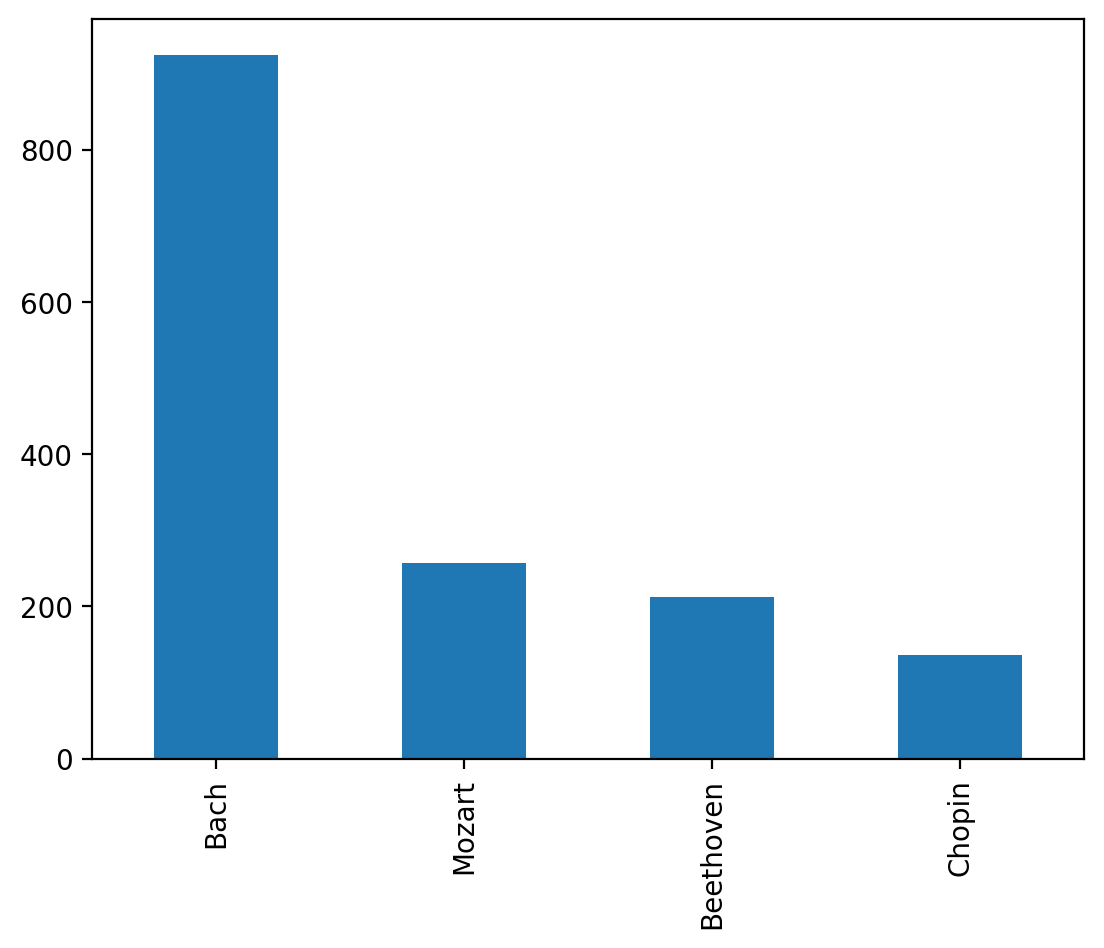

In [10]:
df['composer'].value_counts().plot(kind='bar')

In [11]:
df['composer'].value_counts()

Bach         925
Mozart       257
Beethoven    212
Chopin       136
Name: composer, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   midi_file  1530 non-null   object
 1   composer   1530 non-null   object
 2   path       1530 non-null   object
 3   notes      1530 non-null   object
 4   chords     1530 non-null   object
 5   tempos     1530 non-null   object
dtypes: object(6)
memory usage: 71.8+ KB


In [13]:
df.to_csv('./data/preprocessed_data_with_midi.csv', index=False)